In [2]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
!pip install torch

In [4]:
!pip install dgl
!pip install dgllife

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 1.5 MB/s eta 0:00:00


In [5]:
!pip install rdkit

# Imports

In [6]:
import pandas as pd
import numpy as np
import torch
import deepchem as dc
from deepchem.models import GCNModel
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from sklearn.preprocessing import FunctionTransformer
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [7]:
from pandas import MultiIndex, Int64Index
import matplotlib.pyplot as plt

import xgboost as xgb
print("XGB Version:", xgb.__version__)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

<ipython-input-7-b59c469eb15b>:1: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGB Version: 2.0.0


In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
data_1400 = pd.read_excel('/content/drive/MyDrive/atomic_hack_dataset_1400.xlsx')
data_35000 = pd.read_excel('/content/drive/MyDrive/atomick_hack_dataset_35000.xlsx', usecols=[1, 2, 3])

In [10]:
data_1400.head()

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures
0,1007-Ya-213,2.7,500.0,185.185185,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,50.0
1,1007-Ya-213,0.7,447.0,638.571429,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,51.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,53.0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0


In [16]:
data_35000.head()

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [15]:
data_1400.describe()

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,Pictures
count,1468.000000,1468.000000,1.468000e+03,1468.000000,1468.000000,1468.000000,1468.000000,727.000000
mean,50.277063,186.491530,2.210854e+04,384.739636,3.831744,1.333787,81.273215,364.909216
std,92.184768,1009.454293,4.771268e+05,153.164268,2.860473,1.803663,54.078778,210.154325
min,0.000010,0.031928,3.616134e-02,110.157000,0.000000,0.000000,0.000000,1.000000
25%,2.500000,30.375000,1.833333e+00,283.049250,2.000000,0.000000,39.440000,183.500000
50%,10.100000,90.400000,5.528073e+00,349.371000,3.000000,1.000000,71.840000,365.000000
75%,49.450000,300.000000,2.778741e+01,446.508000,5.000000,2.000000,106.160000,546.500000
max,1000.000000,37646.000000,1.632222e+07,1159.380000,19.000000,11.000000,319.510000,728.000000


In [14]:
data_1400.isna().sum()

Title                        0
IC50, mmg/ml                 0
CC50-MDCK, mmg/ml            0
SI                           0
Molecular weight             0
Hydrogen bond acceptors      0
Hydrogen bond donors         0
Polar SA                     0
SMILES                       0
Pictures                   741
dtype: int64

In [11]:
data_1400['SI'] = data_1400['CC50-MDCK, mmg/ml']/data_1400['IC50, mmg/ml']

In [13]:
data_1400.dtypes

Title                       object
IC50, mmg/ml               float64
CC50-MDCK, mmg/ml          float64
SI                         float64
Molecular weight           float64
Hydrogen bond acceptors      int64
Hydrogen bond donors         int64
Polar SA                   float64
SMILES                      object
Pictures                   float64
dtype: object

In [12]:
smiles = data_1400['SMILES']

In [ ]:
featurizer = dc.feat.MolGraphConvFeaturizer()
X = featurizer.featurize(smiles)
labels = data_1400['SI']
dataset = dc.data.NumpyDataset(X=X, y=labels)

In [36]:
?dc.data.NumpyDataset

In [62]:
model = GCNModel(mode='regression', n_tasks=1,
                 batch_size=16, learning_rate=0.001)
loss = model.fit(dataset, nb_epoch=50)

In [63]:
X

array([GraphData(node_features=[14, 30], edge_index=[2, 30], edge_features=None, pos=[0]),
       GraphData(node_features=[14, 30], edge_index=[2, 30], edge_features=None, pos=[0]),
       GraphData(node_features=[18, 30], edge_index=[2, 38], edge_features=None, pos=[0]),
       ...,
       GraphData(node_features=[32, 30], edge_index=[2, 70], edge_features=None, pos=[0]),
       GraphData(node_features=[24, 30], edge_index=[2, 52], edge_features=None, pos=[0]),
       GraphData(node_features=[27, 30], edge_index=[2, 56], edge_features=None, pos=[0])],
      dtype=object)

In [64]:
preds = model.predict(dc.data.NumpyDataset(X=X))

In [70]:
min(preds)

array([-6.1361375], dtype=float32)

In [65]:
from sklearn.metrics import mean_squared_error

In [69]:
np.sqrt(mean_squared_error(data_1400["SI"], preds))

477398.88207585824

# baseline

In [73]:
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA}

In [ ]:
mol_list = [Chem.MolFromSmiles(mol) for mol in data_1400["SMILES"]]
mol_list

In [79]:
def mol_dsc_calc(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X = descriptors_transformer.transform(data_1400['SMILES'])
X.head()

,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
0,14,1,2,2,1,2,2,80,0,0,2,195.306,2.2659,58.6168,32.59
1,14,1,2,2,1,2,2,80,0,0,2,195.306,2.2659,58.6168,32.59
2,18,0,2,2,0,2,5,104,0,0,2,250.430,3.6154,79.3190,15.60
3,16,0,2,2,0,2,3,92,0,0,2,222.376,2.8352,70.0850,15.60
4,17,0,3,3,0,3,3,98,0,0,2,239.359,2.3060,67.6630,29.54


In [84]:
params = {
    "objective": "reg:squarederror",
    "n_estimators":100,
    "max_depth": 4,
    "learning_rate": 0.01,
    "subsample": 0.8,
    "colsample_bytree": 0.9,
    "colsample_bylevel": 0.8,
    "reg_lambda": 0.1,
    "eval_metric": "rmse",
    "random_state": 42,
}

In [86]:
y = data_1400['IC50, mmg/ml']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [85]:
reg = xgb.XGBRegressor(**params)

In [88]:
reg.fit(X_train,
        y_train,
        verbose=False,
        eval_set= [(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds= 3
        )

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None, colsample_bytree=0.9,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [89]:
reg.score(X_train, y_train, sample_weight=None)

0.3208425779424342

In [90]:
results = reg.evals_result()

In [93]:
results['validation_1']['rmse'][reg.best_iteration]

88.9753517926065

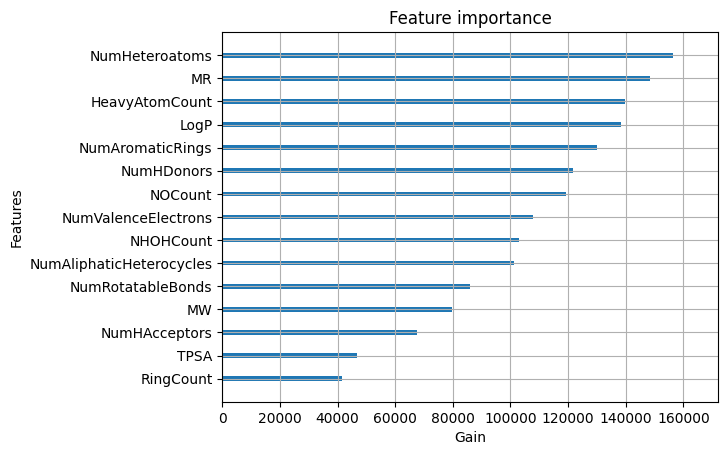

In [94]:
xgb.plot_importance(reg,
                    importance_type="gain",
                    show_values=False,
                    xlabel="Gain");

In [97]:
reg.save_model("xgboost_1.json")

In [ ]:
!pip install https://github.com/HyunSeobKim/CHEM-BERT#fine-tuning-with-a-pre-trained-model

In [98]:
!python -m pip install git+https://github.com/HyunSeobKim/CHEM-BERT/tree/master

  Cloning https://github.com/HyunSeobKim/CHEM-BERT/tree/master to /tmp/pip-req-build-g9oinboy
  Running command git clone --filter=blob:none --quiet https://github.com/HyunSeobKim/CHEM-BERT/tree/master /tmp/pip-req-build-g9oinboy
  fatal: repository 'https://github.com/HyunSeobKim/CHEM-BERT/tree/master/' not found
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/HyunSeobKim/CHEM-BERT/tree/master /tmp/pip-req-build-g9oinboy did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/HyunSeobKim/CHEM-BERT/tree/master /tmp/pip-req-build-g9oinboy did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [100]:
!git clone https://github.com/HyunSeobKim/CHEM-BERT

Cloning into 'CHEM-BERT'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 91 (delta 47), reused 43 (delta 14), pack-reused 0
Receiving objects: 100% (91/91), 32.49 KiB | 899.00 KiB/s, done.
Resolving deltas: 100% (47/47), done.
Error downloading object: model/pretrained_model.pt (d27ead0): Smudge error: Error downloading model/pretrained_model.pt (d27ead0dd458f126b6676efa35195b7cdbf50414d6f874a90a2a1240b51803cb): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/CHEM-BERT/.git/lfs/logs/20231021T130353.554460263.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: model/pretrained_model.pt: smudge filter lfs failed
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=HEAD :/'

# Векторизация на совместном датасете

In [45]:
data_1400_new = data_1400[["SMILES", "IC50, mmg/ml"]]
data_35000_new = data_35000[["SMILES", "IC50"]]

In [46]:
data_1400_new  = data_1400_new.rename(columns={'IC50, mmg/ml': 'IC50'})

In [89]:
data_total = pd.concat([data_1400_new, data_35000_new])

In [48]:
len(data_total)

37845

In [90]:
data_total = data_total.drop_duplicates()

In [51]:
len(data_total)

36397

In [52]:
data_total

,SMILES,IC50
0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.70
1,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,0.70
2,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,9.90
3,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,8.30
4,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,39.40
...,...,...
36372,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...,2366.79
36373,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O,2372.10
36374,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...,2600.97
36375,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O,2793.00


In [53]:
data_total.describe()

,IC50
count,36397.000000
mean,7.752732
std,48.336835
min,0.000010
25%,1.686000
50%,3.632000
75%,5.927000
max,3183.600000


In [91]:
data_total = data_total[data_total["IC50"] < 10][10000:20000]

In [92]:
data_total.isna().sum()

SMILES    0
IC50      0
dtype: int64

In [93]:
data_total.describe()

,IC50
count,10000.000000
mean,2.988079
std,0.572993
min,1.829000
25%,2.542000
50%,3.058000
75%,3.471000
max,3.885000


<Axes: >

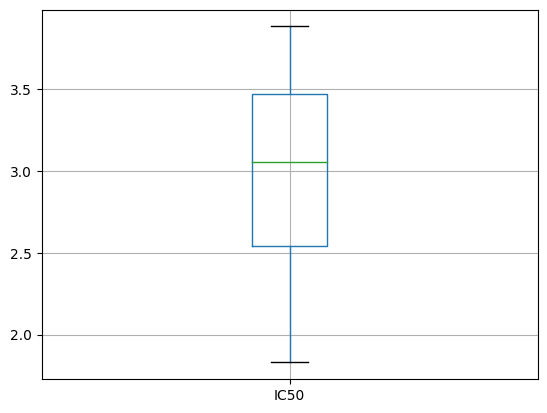

In [94]:
data_total.boxplot(column=['IC50'])

In [57]:
len(data_total)

35781

,SMILES,IC50,Molecule
9560,CC(C)(C)c1ccc(cc1)/C=N/Nc2nncn2N,1.829,
9561,CCCCC(=O)NCc(c1)ccc(c12)n(C)c(C)c2,1.829,
9562,CN(C)c1nc(N(C)C)nc(n1)Nc2ccccc2,1.829,
9563,O=C(O)CCc1ccc(o1)-c(cc2)ccc2C,1.829,
9564,O=C(O)c1ccc(cn1)C2CCCCC2,1.829,
...,...,...,...
19729,c1ccccc1CN2C(=O)C[C@H](C2=O)N(CC3)CCC3c(n4)[nH...,3.885,
19730,COc(cc1)c(OC)cc1[C@@H](C2)N(c3ccccc3)N=C2c4ccc...,3.885,
19731,CCC(CC)O[C@H](C=C1C(=O)O)[C@H](NC(=O)C)[C@H](C...,3.885,
19732,c1ccc(OC)cc1CN(C)C(=O)c2cc(-c3cccs3)nc(c24)cccc4,3.885,

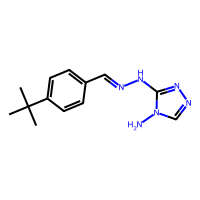
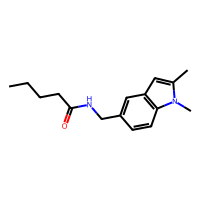
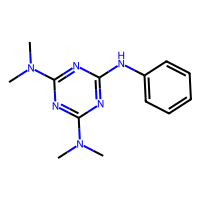
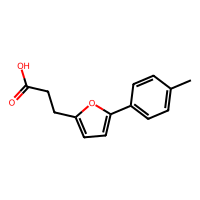
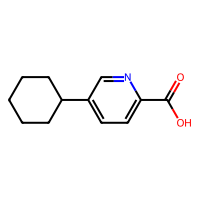
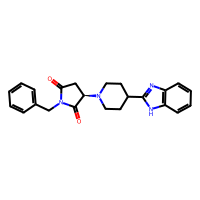
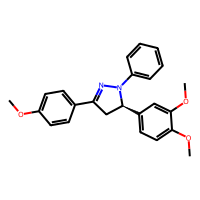
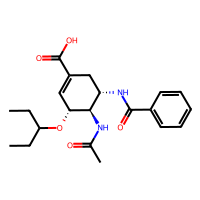
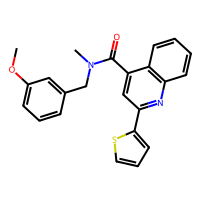
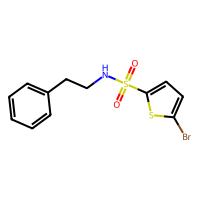

In [95]:
PandasTools.AddMoleculeColumnToFrame(data_total,'SMILES','Molecule')
data_total

In [27]:
!python -m pip install git+https://github.com/EBjerrum/molvecgen

  Cloning https://github.com/EBjerrum/molvecgen to /tmp/pip-req-build-wzn17k7o
  Running command git clone --filter=blob:none --quiet https://github.com/EBjerrum/molvecgen /tmp/pip-req-build-wzn17k7o
  Resolved https://github.com/EBjerrum/molvecgen to commit f81d5aade18bea60882f5845877f6283366bbe91
  Preparing metadata (setup.py) ... done
  Created wheel for molvecgen: filename=molvecgen-0.1-py3-none-any.whl size=11357 sha256=cb8583042ffd077e1736f155fd3753c6a957ed7eb6f9ea2020107f23f9c41303
  Stored in directory: /tmp/pip-ephem-wheel-cache-8gnew9o7/wheels/1c/de/14/fd9892b48271e63e56b00c7015c754ae6189e258fa313a7c63
Successfully built molvecgen


In [28]:
from molvecgen.vectorizers import SmilesVectorizer

In [59]:
data_total.Molecule.values

array([<rdkit.Chem.rdchem.Mol object at 0x7aae8f739d90>,
       <rdkit.Chem.rdchem.Mol object at 0x7aaeadd65460>, ...,
       <rdkit.Chem.rdchem.Mol object at 0x7aae8e3a1e00>], dtype=object)

In [96]:
smivec = SmilesVectorizer(pad=1, leftpad=True, canonical=False, augment=True)
smivec.fit(data_total.Molecule.values)

In [97]:
smivec.charset

'r6)@IB72Cco+[=O4.]S-#1N\\/F(Ps3nl5H^$?'

In [98]:
print("Maximum allowed SMILES length %s"%smivec.maxlength)

Maximum allowed SMILES length 234


In [99]:
y = data_total['IC50'].values.reshape((-1,1))
X = data_total.Molecule.values
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)
#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [100]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [101]:
X_test_t = smivec.transform(X_test, canonical=False)
X_test_t = torch.tensor(X_test_t, device=device).float()
y_test_t = torch.tensor(y_test, device=device).float()

In [102]:
class SMILESMolDataset(Dataset):
    def __init__(self, molecules, y, vectorizer):
        self.molecules = molecules
        self.y = y
        self.vectorizer = vectorizer
    def __len__(self):
        return len(self.molecules)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mols = self.molecules[idx]

        #The vectorizer was written to work with batches,
        #but PyTorch datasets unfortunately works with single samples
        sample = self.vectorizer.transform([mols])[0]
        label = self.y[idx]
        return sample, label

In [103]:
train_dataset = SMILESMolDataset(X_train, y_train, smivec)
train_dataset[5][0][3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [104]:
data_total.isna().sum()

SMILES      0
IC50        0
Molecule    0
dtype: int64

In [105]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [106]:
class Net(nn.Module):
    def __init__(self, dimensions, lstm_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()

        length = dims[0]
        number_tokens = dims[1]


        self.lstm = nn.GRU(input_size=number_tokens, hidden_size=lstm_size, num_layers=1, batch_first=True, bidirectional=False, dropout  = 0.2)
        self.fc1 = nn.Linear(lstm_size, hidden_size) # Output layer
        self.activation = nn.ReLU() # Non-Linear ReLU Layer
        self.fc2 = nn.Linear(hidden_size, hidden_size//2) # Output layer
        self.activation2 = nn.ReLU() # Non-Linear ReLU Layer
        self.fc_out = nn.Linear(hidden_size//2, out_size) # Output layer
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):# Forward pass: stacking each layer together
        #out, (h_n, c_n) = self.lstm(x) #LSTM network reads in one-hot-encoded SMILES, h_n is last output, out is for all timesteps
        out, h_n = self.lstm(x) #GRU network reads in one-hot-encoded SMILES, h_n is last output, out is for all timesteps
        out = self.dropout(h_n) #Dropout
        out = self.fc1(out) # Pass into the hidden layer
        out = self.activation(out) # Use ReLU on hidden activation
        out = self.fc2(out) # Pass into the hidden layer
        out = self.activation2(out) # Use ReLU on hidden activation
        out = self.dropout(out) # dropout
        out = self.fc_out(out) # Use a linear layer for the output
        return out

In [108]:
epochs = 40
dims = smivec.dims
lstm_size = 32  # The size of the LSTM layer
hidden_size = 32  # The size of the hidden non-linear layer
dropout_rate = 0.3 # The dropout rate
output_size = 1        # This is just a single task, so this will be one
batch_size = 64   # The mini_batch size during training
learning_rate = 0.01  # The initial learning rate for the optimizer

In [109]:
model = Net(smivec, lstm_size, hidden_size, dropout_rate, output_size)
model.cuda()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Net(
  (lstm): GRU(37, 32, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=32, out_features=32, bias=True)
  (activation): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (activation2): ReLU()
  (fc_out): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [110]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50,
                  verbose=True, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=1e-6, eps=1e-08)

In [111]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [67]:
from tqdm import trange

In [112]:
model.train() #Ensure the network is in "train" mode with dropouts active
train_losses = []
validation_losses = []
for e in trange(epochs):
    running_loss = 0
    for smiles, labels in train_loader:
        # Push numpy to CUDA tensors
        smiles = torch.tensor(smiles, device=device).float()
        #print(smiles)
        labels = torch.tensor(labels, device=device).float()
        #print(labels)
        #break
        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pass

        output = model(smiles) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step() # Optimize the weights

        running_loss += loss.item()

    else:

        model.eval()
        validation_loss = torch.mean((y_test_t - model(X_test_t))**2).item()
        model.train()

        lr_scheduler.step(validation_loss)

        train_loss = running_loss/len(train_loader)
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)
        if (e+1)%5 == 0:
            print("Epoch %i, Training loss: %0.2F Validation loss: %0.2F"%(e + 1, train_loss, validation_loss))

  0%|          | 0/40 [00:00<?, ?it/s]<ipython-input-112-c5b3ad7db3d4>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  smiles = torch.tensor(smiles, device=device).float()
<ipython-input-112-c5b3ad7db3d4>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, device=device).float()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([1, 64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 12%|█▎        | 5/40 [00:14<01:45, 

Epoch 5, Training loss: 1.00 Validation loss: 1.01


 25%|██▌       | 10/40 [00:29<01:37,  3.25s/it]

Epoch 10, Training loss: 1.00 Validation loss: 1.01


 38%|███▊      | 15/40 [00:41<01:07,  2.69s/it]

Epoch 15, Training loss: 1.00 Validation loss: 1.01


 50%|█████     | 20/40 [00:55<00:49,  2.50s/it]

Epoch 20, Training loss: 1.00 Validation loss: 1.01


 62%|██████▎   | 25/40 [01:09<00:39,  2.62s/it]

Epoch 25, Training loss: 1.00 Validation loss: 1.01


 75%|███████▌  | 30/40 [01:24<00:29,  3.00s/it]

Epoch 30, Training loss: 1.00 Validation loss: 1.01


 88%|████████▊ | 35/40 [01:39<00:14,  2.92s/it]

Epoch 35, Training loss: 1.00 Validation loss: 1.01


100%|██████████| 40/40 [01:53<00:00,  2.83s/it]

Epoch 40, Training loss: 1.00 Validation loss: 1.01


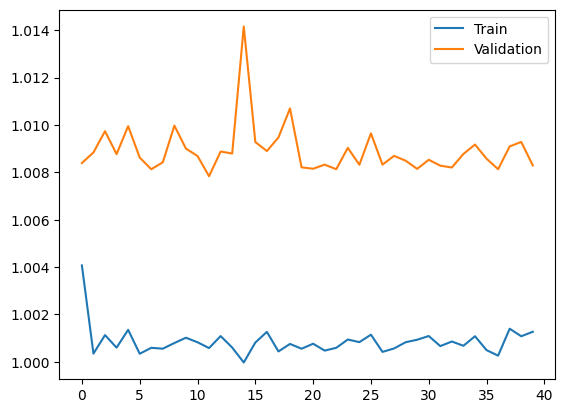

In [113]:
plt.plot(train_losses, label="Train")
plt.plot(validation_losses, label="Validation")
#plt.yscale('log')
plt.legend()

# Новый раздел